## Test results from filtering methods

In [60]:
import numpy as np
import scipy
import  matplotlib.pyplot as plt
from keras import losses

In [61]:
# Load the full test data to be checked
# path for reading the test data
test_path = '../data/processed/cseg_fault_dyke_fold_model_50_2/'

In [62]:
# Read test data and rearrange it
X_test = np.load(test_path + 'X_test.npy')
Y_test = np.load(test_path + 'Y_test.npy')
X_test1 = np.expand_dims(X_test, axis = 3)
Y_test1 = np.expand_dims(Y_test, axis = 3)

In [4]:
# Load the autoencoder model
##  Load the saved model
from keras.models import model_from_json
json_file = open('trained_models/model_2_5_100_1_1/model_1.json')
loaded_model_json = json_file.read()
json_file.close()
autoencoder = model_from_json(loaded_model_json)
autoencoder.load_weights('trained_models/model_1_100_100_1_1/model_1.h5')
print(autoencoder.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 100, 100, 1)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 100, 100, 16)      160       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 50, 50, 8)         1160      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 25, 25, 8)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 25, 25, 8)         584       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 8)         0         
__________

In [5]:
# Denoising using the trained autoencoder
Y_pred = autoencoder.predict(X_test1)


In [53]:
def mse(Y_pred, Y_target):
    mse_error = np.sum(np.square(Y_pred - Y_target))
    return mse_error

In [54]:
# Choosing the sample image from test data for testing
sample_index = 700
X_input = X_test1[sample_index, : ,: , 0]
Y_input = Y_test1[sample_index, :,: , 0]
Y_ca = Y_pred[sample_index, :, :, 0]
print(mse(X_input, Y_input))

814.5322923826467


In [55]:
# Denoising using total variational filtering
from skimage.restoration import denoise_tv_chambolle
X_tv = denoise_tv_chambolle(X_input, weight = 0.1)
print(mse(X_tv, Y_input))

626.4953661239351


In [56]:
# Denoising using bilateral filtering
from skimage.restoration import denoise_bilateral
X_bf = denoise_bilateral(X_input, multichannel = False)
print(mse(X_bf, Y_input))

632.8734594378702


In [57]:
# Denoise based on wavelet filtering
from skimage.restoration import denoise_wavelet
X_wf = denoise_wavelet(X_input)
print(mse(X_wf, Y_input))

571.1267187798526


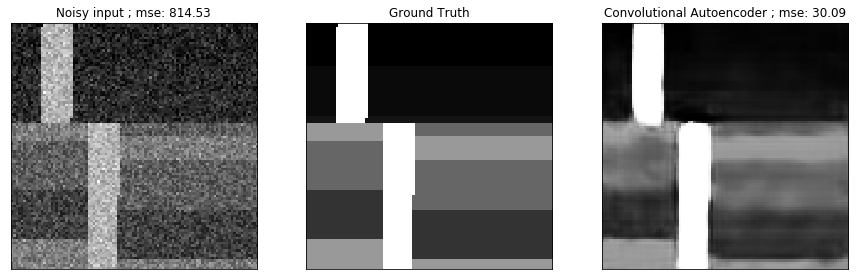

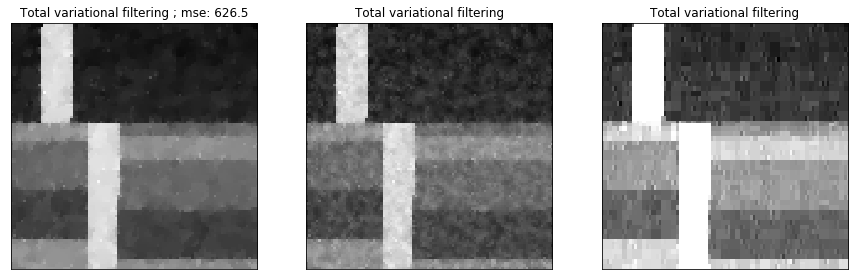

In [58]:
# Randomly visualizing a certain sample from test data
fig, axs = plt.subplots(ncols = 3, figsize = (15, 15))
plt.set_cmap('gray')
axs[0].imshow(X_input)
axs[0].set_title('Noisy input ; mse: ' + str(round(mse(X_input, Y_input), 2)))
axs[1].imshow(Y_input)
axs[1].set_title('Ground Truth')
axs[2].imshow(Y_ca)
axs[2].set_title('Convolutional Autoencoder ; mse: ' + str(round(mse(Y_ca, Y_input), 2)))
fig2, axs2 = plt.subplots(ncols = 3, figsize = (15, 15))
plt.set_cmap('gray')
axs2[0].imshow(X_tv)
axs2[0].set_title('Total variational filtering ; mse: ' + str(round(mse(X_tv, Y_input), 2)))
axs2[1].imshow(X_bf)
axs2[1].set_title('Total variational filtering')
axs2[2].imshow(X_wf)
axs2[2].set_title('Total variational filtering')
# Removing the ticks
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
# Removing the ticks
for ax in axs2:
    ax.set_xticks([])
    ax.set_yticks([])

In [23]:
# Printing the error values
print('Initial error : ', mse(X_input, Y_input))
print('Total variational filtering : ', mse(X_tv, Y_input))
print('Convolutional Autoencoder : ', mse(Y_ca, Y_input))

Initial error :  266.2270192526288
Total variational filtering :  103.64679201941806
Convolutional Autoencoder :  12.532145146858275
